# Objectif :
Nous allons chercher à déterminer les paramètres pertinents d'un modèle pour lesquelles nous connaissons des données entachées d'une incertitude.

## Modèle :
Le modèle utilisée est linéaire. Par exemple, il peut s'agir d'un temps de vol en fonction de la distance avec une erreur systématique conduisant à une ordonnée à l'origine non nulle.
\begin{equation*}
y = a_\text{vrai}\cdot  x + b_\text{vrai} 
\end{equation*}

## Incertitudes : 
Deux sources d'incertitudes sont prises en compte :
\begin{itemize}
\item Une incertitude aléatoire normale centrée sur y de paramètre $\sigma$
\item Une incertitude exponentielle de paramètre $\tau$ traduisant une probabilité de detection à partir de l'arrivée du signal.
\end{itemize}

### Incertitude normale : 
\begin{equation*}
p_\text{norm.} (y_\text{i}) = \dfrac{1}{\sigma_0\cdot\sqrt{2\pi}}\cdot \exp\left( \dfrac{1}{2}\cdot\left( \dfrac{y_\text{i} - y_\text{vrai}}{\sigma_0}\right)^2\right)
\end{equation*}

### Incertitude exponentielle :
\begin{equation*}
p_\text{exp.}(y_i) = \left\{
    \begin{array}{ll}
        \dfrac{1}{\tau}\cdot \exp\left( -\dfrac{y_\text{i} - y_\text{vrai}}{\tau}\right) & \mbox{si } 0 \leq y_i - y_\text{vrai} \leq \tau  \\
        0 & \mbox{sinon.}
    \end{array}
\right.
\end{equation*}

Cette distribution exponentielle traduit les contraintes suivantes sur la detection :
\begin{itemize}
\item La détection se produit entre le moment d'arrivée du signal et l'infini
\item Le temps de detection à partir du moment d'arrivée possède une valeur moyenne
\end{itemize}

### Incertitude composée : 
Les deux incertitudes précédentes se composent de la manière suivante : 

\begin{equation*}
p_\text{comp.}(Y-y_\text{vrai} ) = \int_0^\infty p_\text{exp}(y)\cdot p_\text{norm.}(Y-y) dy
\end{equation*}

Donnant le résultat suivant [Maximus Deutsch] :

\begin{equation}\label{pComp}
p_\text{comp.}(Y-y_\text{vrai}) = \dfrac{1}{2\tau} \cdot\exp\left( -\dfrac{Y}{\tau}\right) \cdot \exp\left( -\dfrac{\sigma^3}{2\tau^2}\right) \left(1 - \text{erf}\left( \dfrac{\dfrac{\sigma^2}{\tau} - Y}{\sqrt{2}\sigma}\right) \right)
\end{equation}

      
Cette probabilité n'est pas centrée sur $y_\text{vrai}$ comme représentée sur la figure ci-contre :



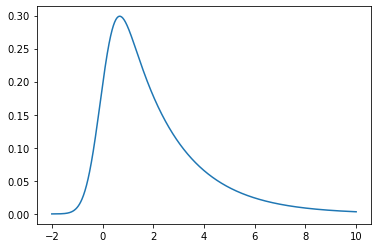

In [1]:
""" Modules """
#Modules standard
import numpy as np  
import matplotlib.pyplot as plt
from scipy.special import erf

tau = 2
sigma = 0.5

X = np.linspace(-2,10,1000)

Py = np.exp(-X/tau)/tau * np.exp(-(sigma**2)/2/tau**2) / 2 *(1 - erf((-X+ (sigma**2) / tau) / (np.sqrt(2)*sigma)))

plt.plot(X, Py)

# Génération des données : 

Des données sont générées suivant les paramètres : 
\begin{equation*}
    \left\{\begin{array}{ll}
        a  & = 2  \\
        b & = 1  \\
        \tau & = 2  \\
        \sigma & = 0.5  \\
    \end{array}
    \right.
\end{equation*}

Ces paramètres sont les paramètres vrais du modèles. Nous allons chercher à inférer a, b et $\tau$ à partir des données générée aléatoirement, comme ce qui pourrait être réalisé pour une analyse de données expérimentale.


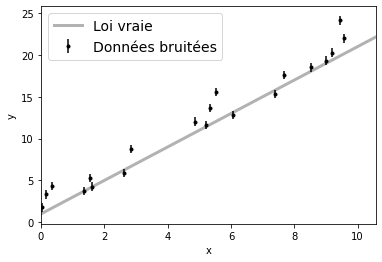

In [3]:
""" Paramètres :"""
# Permet de varier l'initialisation du générateur pseudo-aléatoire
np.random.seed(12)          

# Paramètre du modèle afine : y = ax + b
a_vrai = 2
b_vrai = 1

# Paramètres des bruits aléatoires
sigma0 = 0.5
tau = 2


""" Génération de données à partir du modèle """
N = 20
Xdata = np.sort(10 * np.random.rand(N))
Yvrai = a_vrai * Xdata + b_vrai
Ydata = np.random.normal(Yvrai, sigma0) # Bruit gaussien
Ydata +=  np.random.exponential(tau, N)


""" Tracé de data = {Xvrai, Yvrai, sigma0} et la loi vrai """
plt.figure(0)
plt.errorbar(Xdata, Ydata, yerr=sigma0, fmt=".k", capsize=0, label = "Données bruitées")
x0 = np.linspace(0, max(Xdata)+1, 500)
plt.plot(x0, a_vrai * x0 + b_vrai, "k", alpha=0.3, lw=3, label="Loi vraie")
plt.xlim(0, max(Xdata)+1)
plt.xlabel("x")
plt.ylabel("y");
plt.legend(fontsize=14)

# Régression linéaire

Une procédure de régression linéaire est vouée à l'échec. En effet, cette dermière permet d'inférer des paramètres d'un modèle, mais uniquement si les incertitudes suivent une loi normale. 

Regression linéaire :
a_RL = 2.028 ± 0.034
b_RL = 2.041 ± 0.200


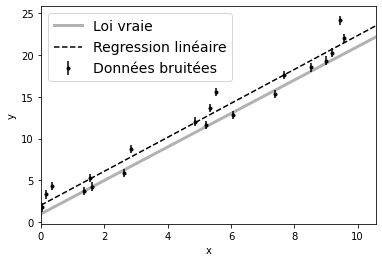

In [4]:
class Sol2parametres:
    def __init__(self):
        self.A = 0
        self.B = 0
        self.SigmaA = 0
        self.SigmaB = 0
        self.W = 0
        self.A_PlusSigma = 0
        self.A_MoinsSigma = 0
        self.B_PlusSigma = 0
        self.B_MoinsSigma = 0
        


        
def LinearReg(X, Y, SigmaY):
    # Linear reg
    N = len(X)
    Out = Sol2parametres()
    sigma_err = SigmaY* np.ones(N)
    A = np.vander(X, 2)
    #C = np.diag(sigma_err * sigma_err)
    ATA = np.dot(A.T, A / (sigma_err ** 2)[:, None])
    cov = np.linalg.inv(ATA)
    w = np.linalg.solve(ATA, np.dot(A.T, Y / sigma_err ** 2))
    Out.A = w[0]
    Out.B = w[1]
    Out.SigmaA = np.sqrt(cov[0, 0])
    Out.SigmaB = np.sqrt(cov[1, 1])
    Out.W = w
    return Out


Out = LinearReg(Xdata,Ydata,sigma0)
a_RL = Out.A                #Estimateur de a_vrai    
b_RL = Out.B                #Estimateur de b_vrai
Sigma_a_RL = Out.SigmaA     #Ecart-type sur a
Sigma_b_RL = Out.SigmaB     #Ecart-type sur b

""" Tracé de data et de la regression linéaire"""
plt.figure(1)
plt.errorbar(Xdata, Ydata, yerr=sigma0, fmt=".k", capsize=0, label = "Données bruitées")
x0 = np.linspace(0, max(Xdata)+1, 500)
plt.plot(x0, a_vrai * x0 + b_vrai, "k", alpha=0.3, lw=3, label="Loi vraie")
plt.plot(x0, a_RL * x0 + b_RL, "--k", label="Regression linéaire")
plt.legend(fontsize=14)
plt.xlim(0, max(Xdata)+1)
plt.xlabel("x")
plt.ylabel("y");

print("Regression linéaire :")
print("a_RL = {0:.3f} ± {1:.3f}".format(Out.A,Out.SigmaA))
print("b_RL = {0:.3f} ± {1:.3f}".format(Out.B, Out.SigmaB))

Seul le paramètre $a$ est correctement inférée. Tous les autres paramètres, incertitudes comprises n'ont pas de sens, connaissant le modèle sous-jacent.

# Détermination des paramètres avec la librairie EMCEE

La librairie EMCEE permet de réaliser une inférence sur des modèles possédant de nombreux paramètres. Son principe de fonctionnement repose sur l'utilisation de chaînes de Markov, c'est à dire une exploration aléatoire de l'espace des paramètres par des "marcheurs" aléatoires.

L'utilisation de telles procédures repose sur la maximisation d'une fonction de vraisemblance :

\begin{equation*}
p(y_\text{data}) = \prod_i p(y_i) 
\end{equation*}

Avec $p(y_i)$ l'incertitude composée déterminée précédement (voir eq. \ref{pComp}).

Pour des questions d'algorithmie, nous allons utiliser le logarithme de la fonction vraisemblance. Le logarithme étant une fonction croissante monotone, maximiser $\log p(y_\text{data})$ permet de répondre au problème.

Cette fonction possède 3 paramètres : a, b et $\tau$.

In [5]:
import emcee

def log_Vraisemblance(theta, x, y, sigma):
    a, b, tau = theta
    if tau < 0.00001:
        return -np.inf
    model = a * x + b
    Yerr = y - model;
    Py = np.exp(-Yerr/tau)/tau * np.exp(-(sigma**2)/2/tau**2) / 2 *(1 - erf((-Yerr+ (sigma**2) / tau) / (np.sqrt(2)*sigma)))
    if (Py == 0).any() :
        return -np.inf
    return np.sum(np.log(Py))

    
Precision = 3

nwalkers = 5*Precision  # Paramètre EMCEE : nombre de "marcheurs"
nburn = 2000*Precision  # Paramètre EMCEE : nombre de points avant stabilisation des chaînes
nsteps = nburn + 2000*Precision  # Paramètre EMCEE : nombre de pas

pos = [2,1,3] + 1e-1 * np.random.randn(nwalkers, 3) # Position initiale permettant d'accélérer la convergence
nwalkers, ndim = pos.shape # Paramètre EMCEE

#Algorithme EMCEE
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_Vraisemblance, args=(Xdata, Ydata, sigma0))
sampler.run_mcmc(pos, nsteps, progress=True);
flat_samples = sampler.get_chain(discard=nburn, thin=15, flat=True)    


 37%|███████████████████████████▋                                               | 4433/12000 [00:03<00:05, 1391.47it/s]<ipython-input-5-21d282efa73f>:9: RuntimeWarning: overflow encountered in exp
  Py = np.exp(-Yerr/tau)/tau * np.exp(-(sigma**2)/2/tau**2) / 2 *(1 - erf((-Yerr+ (sigma**2) / tau) / (np.sqrt(2)*sigma)))
<ipython-input-5-21d282efa73f>:9: RuntimeWarning: invalid value encountered in multiply
  Py = np.exp(-Yerr/tau)/tau * np.exp(-(sigma**2)/2/tau**2) / 2 *(1 - erf((-Yerr+ (sigma**2) / tau) / (np.sqrt(2)*sigma)))
100%|██████████████████████████████████████████████████████████████████████████| 12000/12000 [00:08<00:00, 1386.33it/s]


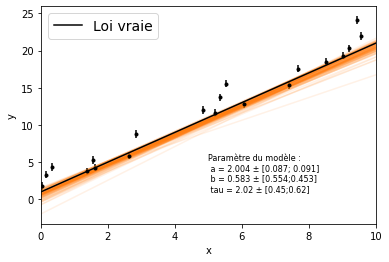

In [6]:
# Tracé graphique
sol=[]
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    #txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    #txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #display(Math(txt))
    sol.append(mcmc[1])
    sol.append(q[0])
    sol.append(q[1])
    
    
a_sol = []    
mcmc = np.percentile(flat_samples[:, 0], [16, 50, 84])
q = np.diff(mcmc)
a_sol.append(mcmc[1])
a_sol.append(q[0])
a_sol.append(q[1])
    

inds = np.random.randint(len(flat_samples), size=100)
plt.figure(4)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
    
plt.errorbar(Xdata, Ydata, yerr=sigma0, fmt=".k", capsize=0)
plt.plot(x0, a_vrai * x0 + b_vrai, "k", label="Loi vraie")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.text(5,1, "Paramètre du modèle :\n a = {0:.3f} ± [{1:.3f}; {2:.3f}]\n b = {3:.3f} ± [{4:.3f};{5:.3f}]\n tau = {6:.2f} ± [{7:.2f};{8:.2f}]"\
         .format(sol[0],sol[1],sol[2],sol[3],sol[4],sol[5],sol[6],sol[7],sol[8]),fontsize=8);


Les zones fortement colorées correspondent à l'espace des paramètres où les "marcheurs" aléatoires ont passée le plus de temps : il s'agit du maximum de vraisemblance.

De manière pertinente, ces techniques permettent de remonter aux paramètres du modèle et d'en donnée des intervales de crédibilités fiables en accord avec des modèles complexes.